# Assignment 1 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from IPython.display import display, Math, Latex
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

In [2]:
%matplotlib inline

# CM1
## Q1.1

### IRIS Dataset

In [3]:
df_iris_data = pd.read_csv('iris_dataset_missing.csv')

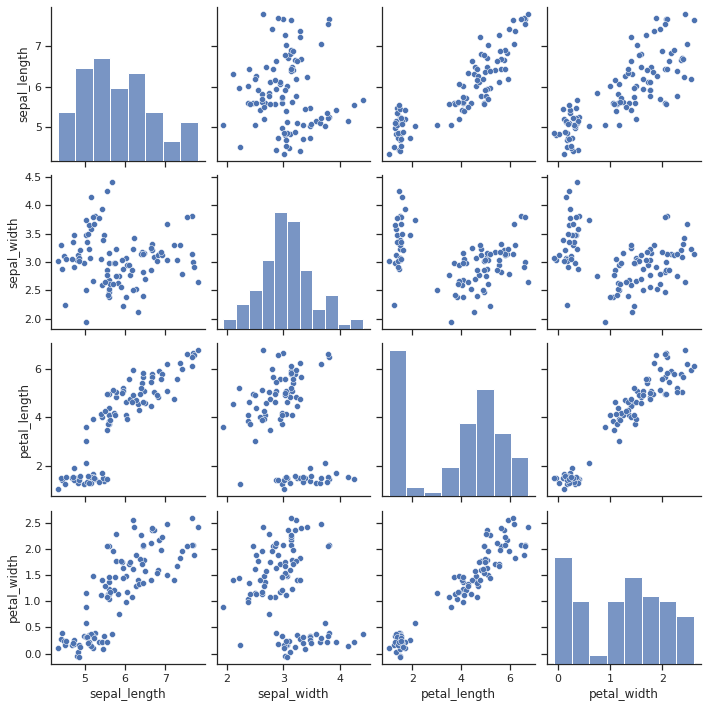

In [4]:
sb.set(style="ticks", color_codes=True)
sb.pairplot(df_iris_data)
plt.show()

From the previous figure we can see that the following features have a correlation:
- petal_width and petal_length form a positive correlation
- petal_length and sepal_length form a positive coorelation
- petal_width and sepal_length form a positive correlation

### Heart Disease Dataset

In [5]:
df_heart_data = pd.read_csv('heart_disease_missing.csv')

bins = ['sex', 'fbs', 'exang']
cats = ['cp', 'restecg', 'slope', 'thal']
ords = ['ca']
nums = ['age', 'oldpeak', 'trestbps', 'chol', 'thalach']
target = ['target']

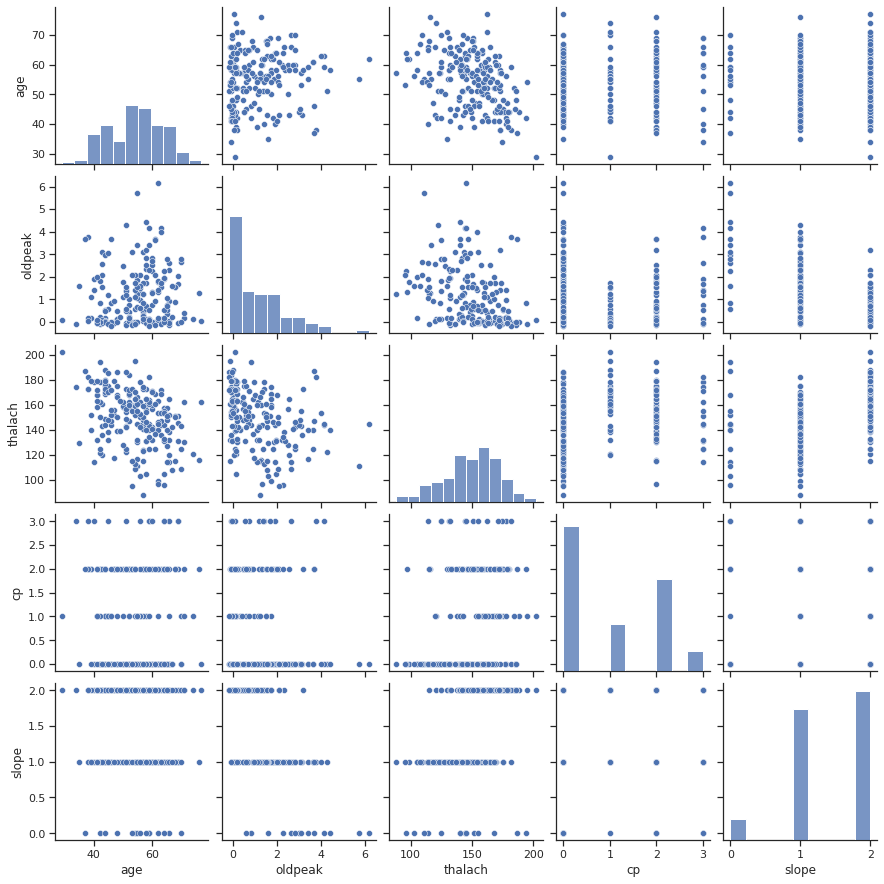

In [6]:
sb.set(style="ticks", color_codes=True)
features = ['age', 'oldpeak', 'thalach', 'cp', 'slope']
df_heart_subset = df_heart_data[features+target]
sb.pairplot(df_heart_subset, vars=features)
plt.show()

The previous figure shows the subplots for the selected features in the heart disease dataset. The selected 
features were age, oldpeak, thalach, cp, and slope. From the following plots we can see that the following 
features have a correlation:

- thalach and age have a slight negative correlation
- Slope has a negative correlation with age, and oldpeak, and a positive correlation with thalach

## Q1.2

Age, oldpeak, thalach, cp, and slope were selected as the interesting features after performing the following evaluation.

First the distribution of each feature was examined by plotting a histogram for each, this can be seen in the following figure.

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


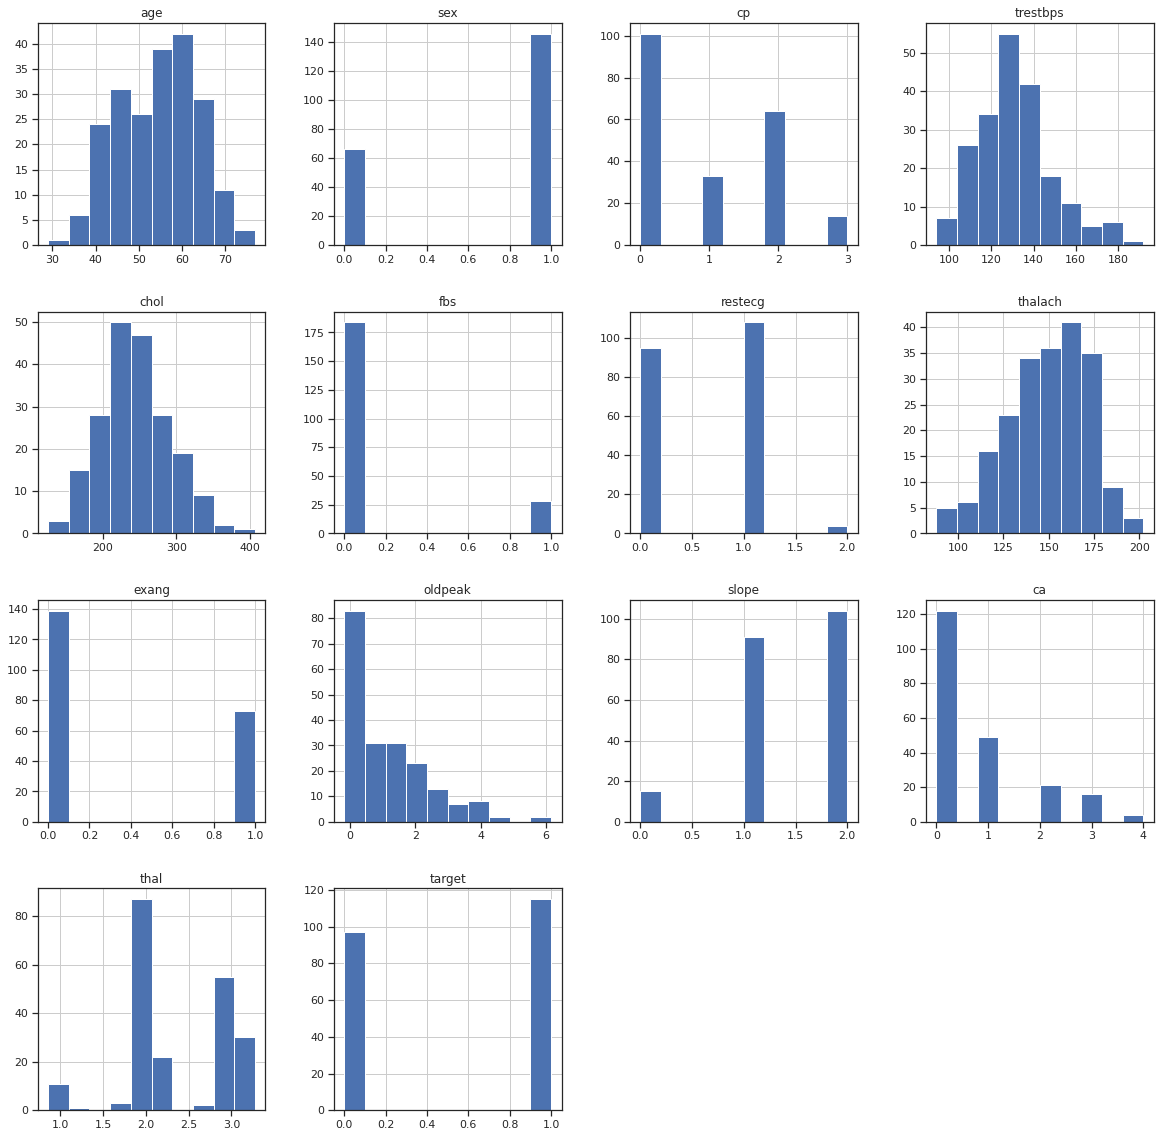

In [7]:
# Histogram
fig = plt.figure(figsize=(20,20)).gca()
df_heart_data.hist(ax=fig,bins=10)
plt.show()

These histograms show that each of the numerical features form a gaussian distribution, some skewed however.

- Age looks to be close to a normal gaussian distribution
- Trestbsp looks to be skewed to the right
- Chol looks to be close to a normal gaussian distribution
- Thalach looks to be skewed to the left
- Oldpeak looks to be a skewed to the right

Next the correlation matrix for the entire feature set was examined

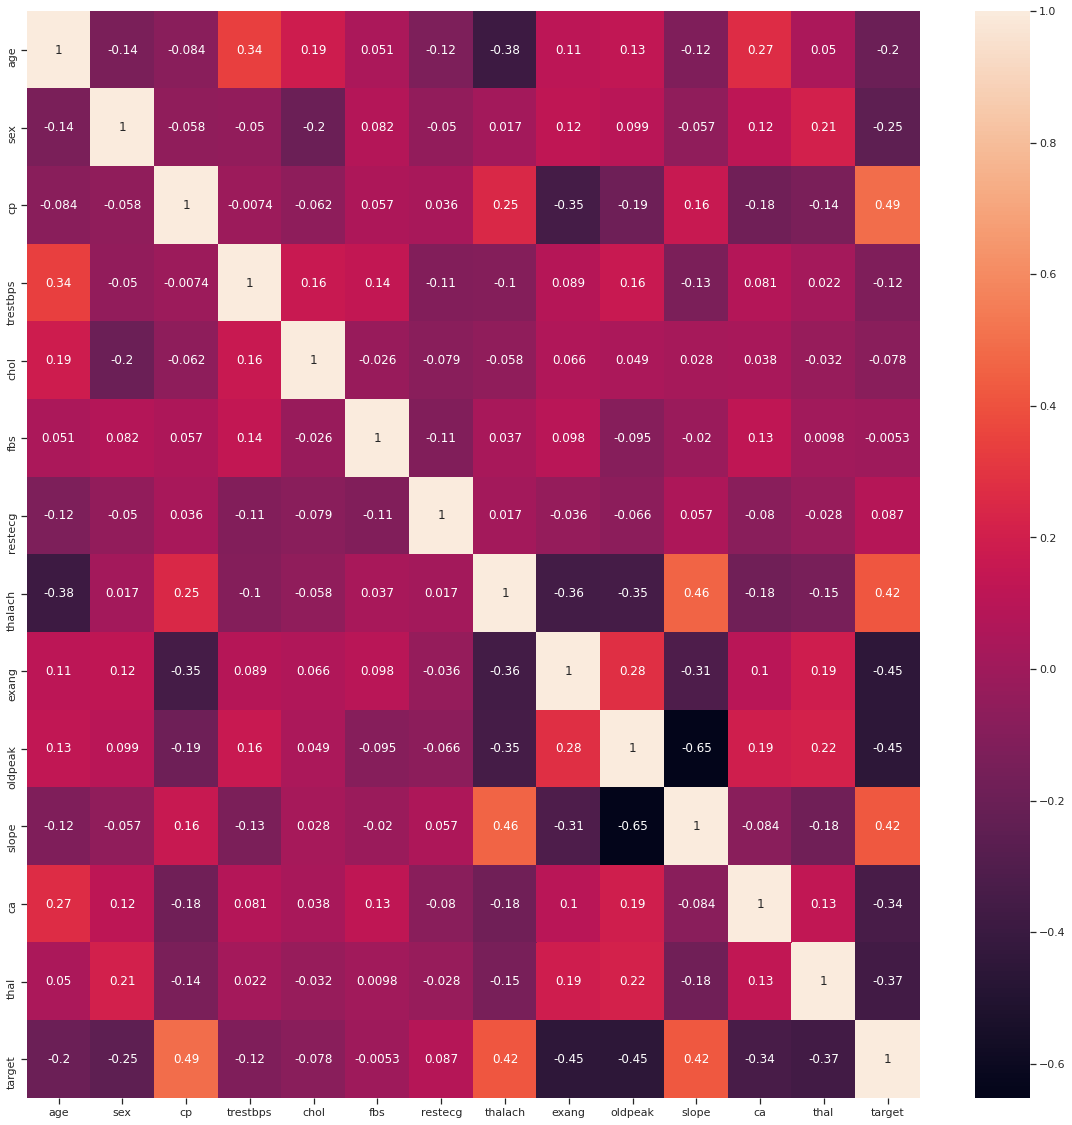

In [8]:
# Correlation matrix 
fig = plt.figure(figsize=(20,20)).gca()
corr_matrix = df_heart_data.corr()
sb.heatmap(corr_matrix, annot=True)
plt.show()

From the previous figure we can see that a few of the numerical features have a stronger correlation (positive or negative), 
for example age and thalac, and oldpeak and thalac. The features that had these correlations were selected 
in the subset of features. We also see slope having a high correlation (positive and negative) with quite a few features, hence it was included. cp was 
also included due to its high correlation with target.

In [9]:
display(Latex(r"\newpage")) #Hopefully should create a page break when we export it

<IPython.core.display.Latex object>

# CM2
## Q1.3

## Iris dataset correlations

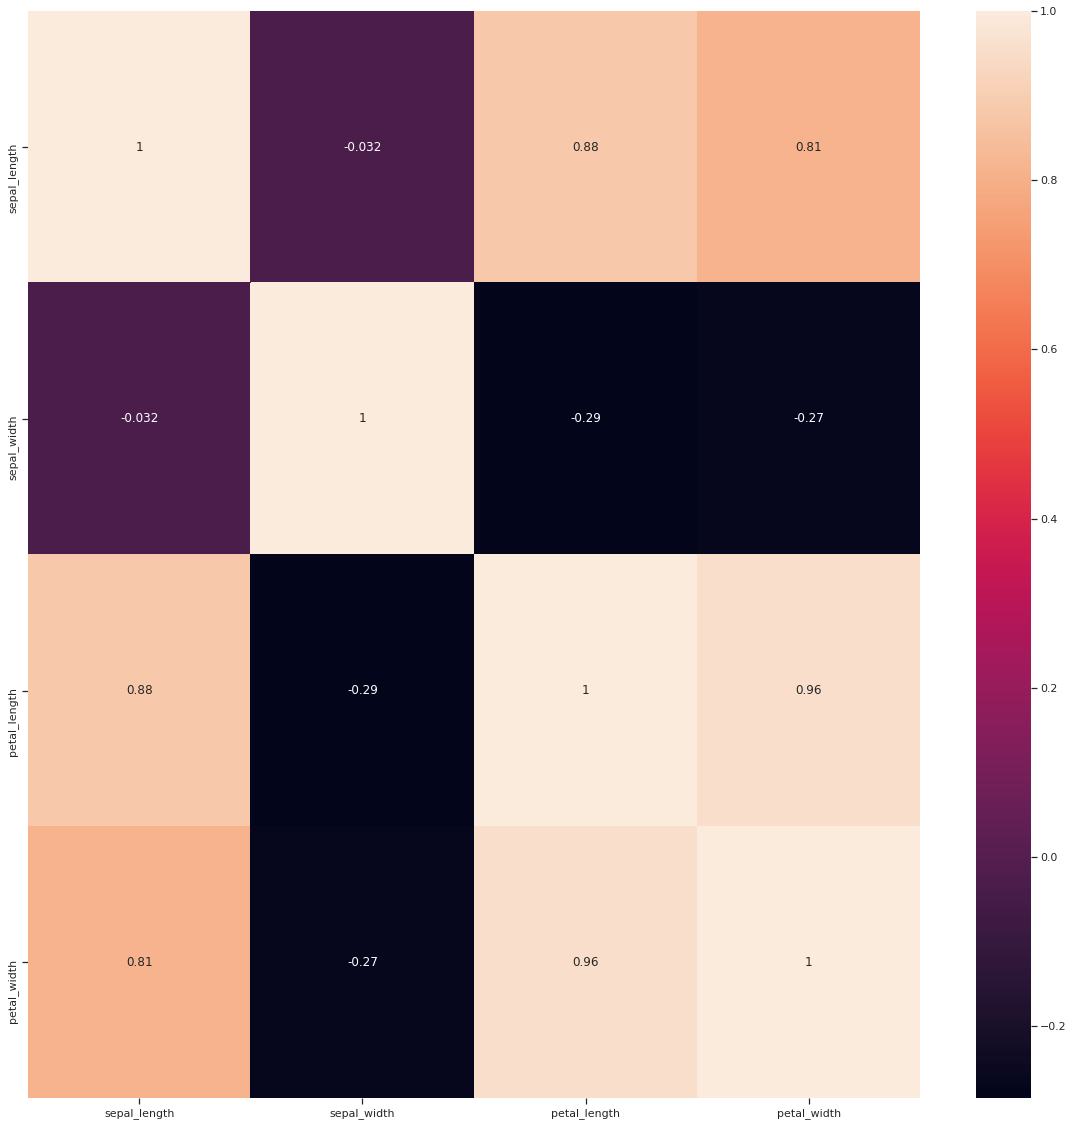

In [10]:
fig = plt.figure(figsize=(20,20)).gca()
corr_matrix = df_iris_data.corr()
sb.heatmap(corr_matrix, annot=True)
plt.show()

Based on the above matrix, Correlation coeffecients for the Iris dataset are as follows:

1. petal_width and sepal_length have a high positive correlation of 0.81
2. petal_width and sepal_width have a slight negative correlation of -0.27
3. petal_width and petal_length have a high positive correlation of 0.96
4. petal_length  and sepal_length have a high positive correlation of 0.88
5. petal_length and sepal_width have a slight negative correlation -0.29
6. sepal_width and sepal_length have negligible correlation with a value of -0.032 

We find the positive correaltions between (petal_width and petal_length), and (petal_length and sepal_length) 
interesting and significant. It was also interesting to see almost neglibible correlation between 
sepal_length and sepal_width. This indicates that if any of the 3 features(petal_width, petal_length and sepal_length) increase or decrease in size, 
the other features will increase or decrease as well.


## Heart Disease Correlations

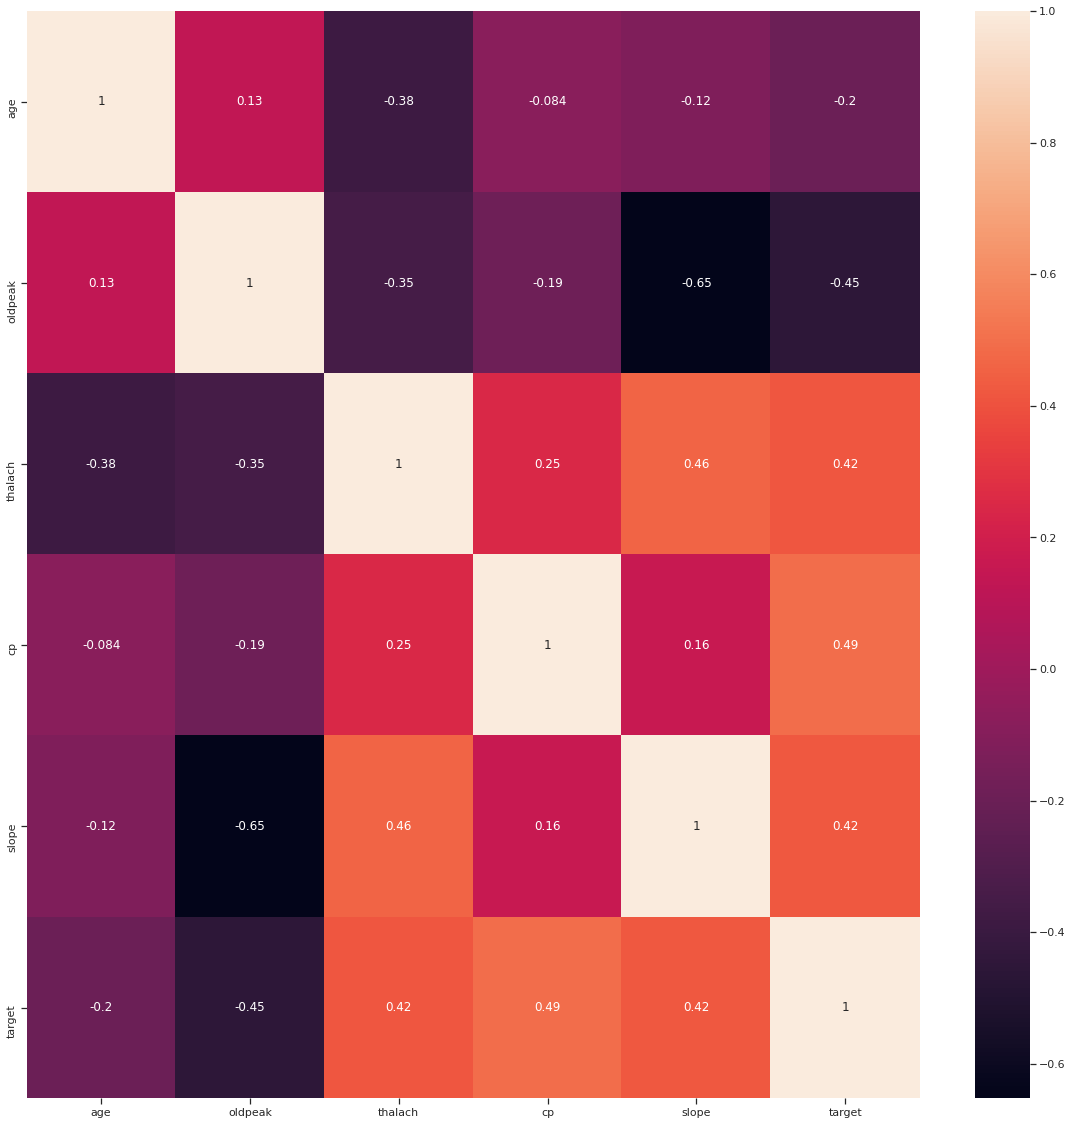

In [11]:
# Correlation matrix 
fig = plt.figure(figsize=(20,20)).gca()
features = ['age', 'oldpeak', 'thalach', 'cp', 'slope']
df_heart_subset = df_heart_data[features+target]
corr_matrix = df_heart_subset.corr()
sb.heatmap(corr_matrix, annot=True)
plt.show()

The correlation coefficients for the subset of heart disease features are:
- age and oldpeak have a very slight positive correlation (0.13)
- age and thalach have a slight negative correlation (-0.38)
- oldpeak and thalac have a slight negative correlation (-0.35)
- slope and age have a slight negative correlation (-0.12)
- slope and oldpeak have a high negative correlation (-0.65)
- slope and thalach have a high positive correlation (0.46)
- cp and age have a very slight negative correlation (-0.084)
- cp and oldpeak have a slight negative correlation (-0.19)
- cp and thalach have a slight positive correlation (0.25)
- cp and slope have a slight positive correlation of (0.19)

The correlation between age and maximum heart rate (thalac) is of interest because this indicates 
that the older a person is the lower the maximum heart rate is. Another one of interest is the negative correlation
between slope and oldpeack because this is the highest correlation between features.

## Q1.4

## Iris dataset 

In [12]:
df_iris_data.mean()


sepal_length    5.858909
sepal_width     3.059083
petal_length    3.812370
petal_width     1.199708
dtype: float64

In [13]:
df_iris_data.var()

sepal_length    0.742420
sepal_width     0.207131
petal_length    3.216602
petal_width     0.619672
dtype: float64

The varaince of the features show us that all the features excluding the petal_length vary slightly around the mean. The
large varaince of petal_length could indicate outliers or data that is highly skewed from a nomal distribution.

In [14]:
df_iris_data.skew()

sepal_length    0.401506
sepal_width     0.367708
petal_length   -0.255767
petal_width    -0.074751
dtype: float64

The skew indicates that each feature is slightly skewed from a normal distribution. It also reveals that the 
large variance for petal_length was most likely caused by outliers, since it is not highly skewed.

In [15]:
df_iris_data.kurt()

sepal_length   -0.544820
sepal_width     0.510490
petal_length   -1.389810
petal_width    -1.315451
dtype: float64

The kurtosis of the features indicate that sepal_width is taller than a normal distribution, 
while the other features (sepal_length, pedal_width, and pedal_length) have flatter than a normal distribution. 

## Heart disease Dataset

In [16]:
df_heart_subset.describe()

,age,oldpeak,thalach,cp,slope,target
count,212.000000,200.000000,208.000000,212.000000,210.000000,212.000000
mean,54.311321,1.113106,149.647978,0.957547,1.423810,0.542453
std,9.145339,1.255908,22.076206,1.022537,0.623622,0.499374
min,29.000000,-0.185668,88.032613,0.000000,0.000000,0.000000
25%,47.000000,0.050778,135.946808,0.000000,1.000000,0.000000
50%,55.000000,0.726060,151.939216,1.000000,1.000000,1.000000
75%,61.000000,1.816733,165.260092,2.000000,2.000000,1.000000
max,77.000000,6.157114,202.138041,3.000000,2.000000,1.000000


In [17]:
df_heart_subset.mean()

age         54.311321
oldpeak      1.113106
thalach    149.647978
cp           0.957547
slope        1.423810
target       0.542453
dtype: float64

In [18]:
df_heart_subset.var()

age         83.637217
oldpeak      1.577304
thalach    487.358850
cp           1.045583
slope        0.388904
target       0.249374
dtype: float64

thalach has high variance. This suggests that their values vary largely from the mean. 
This also suggest possible outliers as is evident by the max and 75th percentile number for these features as shown in the table above.

In [19]:
df_heart_subset.skew()

age       -0.106027
oldpeak    1.224053
thalach   -0.394100
cp         0.461438
slope     -0.604086
target    -0.171644
dtype: float64

We see:
- age is fairly normally distributed although minimally right leaning 
- oldpeak is heavily left leaning as we saw in the histograms above
- thalach is slightly right leaning
- cp is slightly left leaning
- slope leans slightly right

In [20]:
df_heart_subset.kurt()

age       -0.561563
oldpeak    1.363172
thalach   -0.214108
cp        -1.240674
slope     -0.567830
target    -1.989397
dtype: float64

We see age and thalach, cp, and slope have a flatter than normal distribution while oldpeak is taller than normal distribution.

In [21]:
display(Latex(r"\newpage")) #Hopefully should create a page break when we export it

<IPython.core.display.Latex object>

# CM3

## Q1.5

Code to remove outliers


In [22]:
# Remove any outliers and return a copy of the original df sub outliers, zscore for the df, and the boolean mask to get the outliers
def remove_outliers(df, thresh):
    df_zscore = pd.DataFrame()
    
    for col in df.columns[:-1]:
        col_zscore = col +'_zscore'
        #zscore = (val - mean) / std
        df_zscore[col_zscore] = (df[col] - df[col].mean()) / df[col].std(ddof = 0)
    
    outlier_bool_mask = (abs(df_zscore) > thresh).any(1)
    df_outlier_zscore = df_zscore[outlier_bool_mask]
    df_outliers = df[outlier_bool_mask]
    df_removed_outliers = df.drop( df_outliers.index )
    return df_removed_outliers, df_zscore, outlier_bool_mask

## Iris Dataset Outlier detection


For this section, a boxplot was used to visualize if there are any outliers.

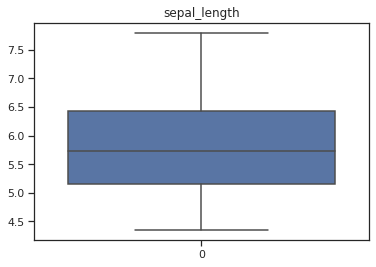

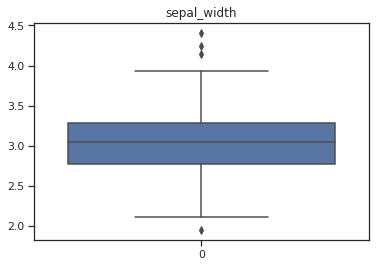

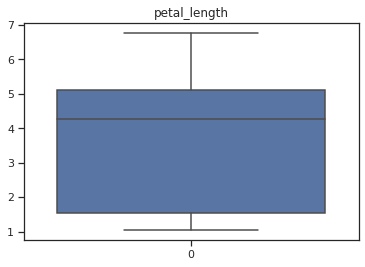

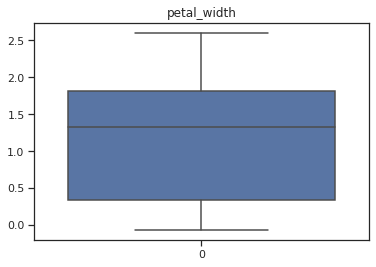

In [23]:
df = df_iris_data
for col in df.columns[:-1]: #remove species col
    sb.boxplot(data=df[col]).set_title(col)
    plt.show()

We see in the boxplots above that we do have some outliers. To resolve the issue of outliers we will use z-score and filter on any outliers > 2.5 over the mean. 

In [24]:
df_iris_no_outliers, df_iris_zscore, df_iris_outlier_mask = remove_outliers(df_iris_data, 2.5)
print('number of removed outliers: ', (len(df_iris_data) - len(df_iris_no_outliers)))
df_iris_data = df_iris_no_outliers

number of removed outliers:  2


## Heart disease dataset

Outlier detection using z-score as a metric, but first lets visualize and see if there are outliers in the Heart dataset.

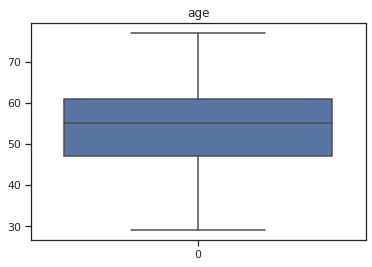

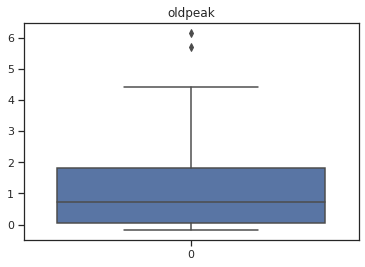

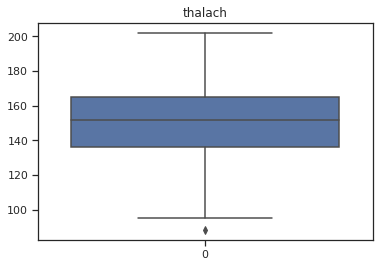

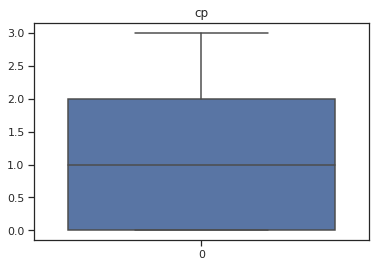

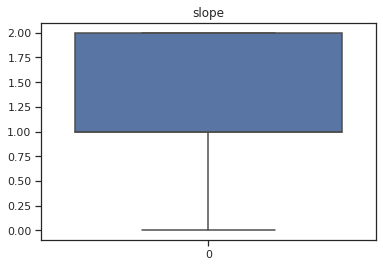

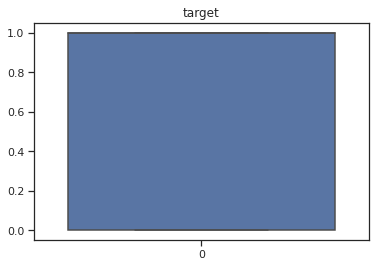

In [25]:
for key in df_heart_subset:
    sb.boxplot(data=df_heart_subset[key]).set_title(key)
    plt.show()

From the boxplots we can see that there are outliers, so we will use Z-score method again for this dataset. We'll remove any outlier > 2.5 of the mean.

In [26]:
df_heart_no_outliers, df_heart_zscore, df_heart_outlier_mask = remove_outliers(df_heart_subset, 2.5)
print('number of outliers removed: ', (len(df_heart_subset) - len(df_heart_no_outliers)))
df_heart_subset = df_heart_no_outliers

number of outliers removed:  6


In [27]:
display(Latex(r"\newpage")) #Hopefully should create a page break when we export it

<IPython.core.display.Latex object>

# CM4

## Q1.6

Histograms of features chosen against target.

age


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

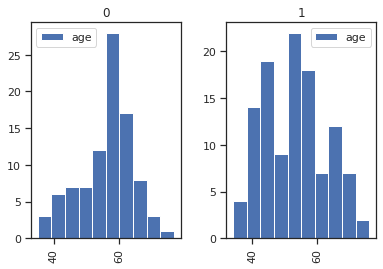

In [28]:
idx = 0
print(features[idx])
df_heart_subset.hist(column = features[idx], by ='target', legend =True)

Here we see that people in their middle age (40-60) are more likely to have heart disease.

oldpeak


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

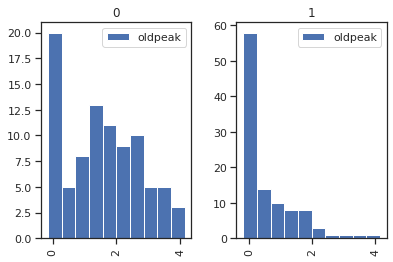

In [29]:
idx = 1
print(features[idx])
df_heart_subset.hist(column = features[idx], by ='target', legend =True)

Here we can see that people without heart disease have varying oldpeak values, 
but if people do have heart disease they are more likely to ahve a lower oldpeak value.

thalach


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

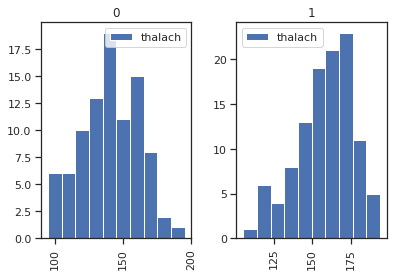

In [30]:
idx = 2
print(features[idx])
df_heart_subset.hist(column = features[idx], by ='target', legend =True)

We see that the distribution of people with heart disease is more right leaning wrt to thalach

cp


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

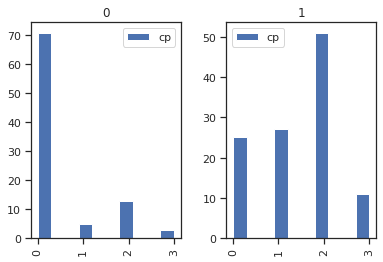

In [31]:
idx = 3
print(features[idx])
df_heart_subset.hist(column = features[idx], by ='target', legend =True)

We can see here that people that dont have heart disease have little to no chest pain, where people with heart disease do.

slope


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

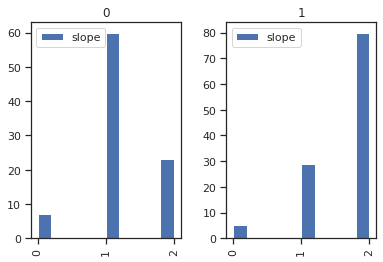

In [32]:
idx = 4
print(features[idx])
df_heart_subset.hist(column = features[idx], by ='target', legend =True)

We can see that a majority of people with no heart disease have upsloping slope where others with heart disease have flat slope.

In [33]:
display(Latex(r"\newpage")) #Hopefully should create a page break when we export it

<IPython.core.display.Latex object>

# CM5

## Q1.7

## Iris dataset

Added mean of the features for missing values (NAN's) since they are all of numerical data type.

In [34]:
df_iris_data.sepal_length.fillna(df_iris_data.sepal_length.mean(), inplace = True);
df_iris_data.sepal_width.fillna(df_iris_data.sepal_width.mean(), inplace = True);
df_iris_data.petal_width.fillna(df_iris_data.petal_width.mean(), inplace = True);
df_iris_data.petal_length.fillna(df_iris_data.petal_length.mean(), inplace = True);


## Heart Dataset


18


<AxesSubplot:>

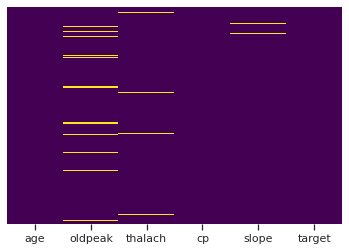

In [35]:
print(len(df_heart_subset[df_heart_subset.isna().any(axis=1)]))
sb.heatmap(df_heart_subset.isna(),yticklabels = False, cbar =False, cmap ='viridis')

We see a few null values in the subset of features for the dataset. For the numerical features we can replace the missing 
values with their respective mean and for the categorical one we can use the mode of that feature.

In [36]:
for col in df_heart_subset.columns[:-1]:
    if col in nums:
        df_heart_subset[col].fillna(df_heart_subset[col].mean(), inplace = True)
    if col in cats or col in bins:
        df_heart_subset[col].fillna(df_heart_subset[col].mode()[0], inplace = True)

In [37]:
display(Latex(r"\newpage")) #Hopefully should create a page break when we export it

<IPython.core.display.Latex object>

## Q2
### IRIS Dataset

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

### Q2.1

Use sklearn to split dataset into train, test, and val. Since there is only a train test split function, we will allocate
test to 40% of the dataset and split that into the validation and test set

In [39]:
iris_train, iris_test = train_test_split(df_iris_data, test_size=0.40, random_state=275, shuffle=True) #take test as 40%
iris_val = iris_test[:int(len(iris_test)/2)] # Set last half of test as the validation set (20% of total)
iris_test = iris_test[int(len(iris_test)/2):] # Remove val set from test set
print('Total: {}\tTrain: {}\tVal: {}\tTest: {}'.format(len(df_iris_data),len(iris_train),len(iris_val),len(iris_test)))

Total: 103	Train: 61	Val: 21	Test: 21


### Q2.2

Create a KNN instance with the default parameters and train on the training set.

In [40]:
knn = KNeighborsClassifier()
X = iris_train[iris_train.columns[:-1]]
y = iris_train.species
knn.fit(X,y)

KNeighborsClassifier()

Call .predict() on the KNN model with default parameters and determine the accuracy by comparing the labels.

In [41]:
X = iris_val[iris_val.columns[:-1]]
y = iris_val.species

pred = knn.predict(X)
acc_default_params = metrics.accuracy_score(y,pred)
print('Accuracy:', acc_default_params)

Accuracy: 0.8571428571428571


### Q 2.3

Training and testing the model for different k values to find the best parameter.

In [42]:
acc_per_k = []
k_vals = [1,5,10,15,20,25,30,35]

X_train = iris_train[iris_train.columns[:-1]]
y_train = iris_train.species

X_val = iris_val[iris_val.columns[:-1]]
y_val = iris_val.species

for k in k_vals:
    #create new model
    knn_model = KNeighborsClassifier(n_neighbors=k)
    
    #train model
    knn_model.fit(X_train,y_train)

    #validate model
    pred = knn_model.predict(X_val)
    #print(k, metrics.accuracy_score(y_val, pred))
    acc_per_k.append(metrics.accuracy_score(y_val, pred))
    print('K: {}\t Accuracy: {}'.format(k,acc_per_k[-1]))


K: 1	 Accuracy: 0.8571428571428571
K: 5	 Accuracy: 0.8571428571428571
K: 10	 Accuracy: 0.8095238095238095
K: 15	 Accuracy: 0.8095238095238095
K: 20	 Accuracy: 0.8095238095238095
K: 25	 Accuracy: 0.8571428571428571
K: 30	 Accuracy: 0.8095238095238095
K: 35	 Accuracy: 0.8095238095238095


### Iris KNN:  K vs Accuracy Plot
As seen in the figure below, our K with the highest accuracy is when `K=1`, `K=5`, and `K=25`

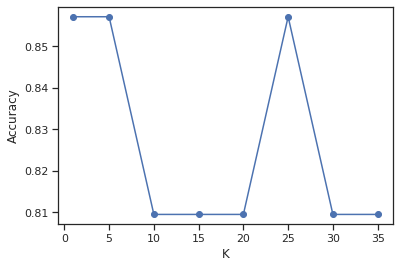

In [43]:
cm6_iris_acc_per_k = acc_per_k
plt.plot(k_vals,acc_per_k, '-o')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

### Heart Disease KNN

### Q 2.1

Use sklearn to split dataset into train, test, and val. Since there is only a train test split function, we will allocate
test to 40% of the dataset and split that into the validation and test set

In [44]:
heart_train, heart_test = train_test_split(df_heart_subset, test_size=0.40, random_state=275, shuffle=True) #take test as 40%
heart_val = heart_test[:int(len(heart_test)/2)] # Set last half of test as the validation set (20% of total)
heart_test = heart_test[int(len(heart_test)/2):] # Remove val set from test set
print('Total: {}\tTrain: {}\tVal: {}\tTest: {}'.format(len(df_heart_subset),len(heart_train),len(heart_val),len(heart_test)))

Total: 206	Train: 123	Val: 41	Test: 42


### Q 2.2
Create a KNN instance with the default parameters and train on the training set. Call .predict() on the KNN model with default parameters and determine the accuracy by comparing the labels.

In [45]:
knn_heart_default = KNeighborsClassifier()
X_train_kheart = heart_train
y_train_kheart = heart_train.target

X_val_heart = heart_val
y_val_heart = heart_val.target

knn_heart_default.fit(X_train_kheart,y_train_kheart)

pred_heart = knn_heart_default.predict(X_val_heart)

print(metrics.accuracy_score(y_val_heart,pred_heart))


0.7073170731707317


### Q 2.3
Training and testing the model for different k values to find the best parameter.

In [46]:
acc_k_heart = []
k_vals = [1,5,10,15,20,25,30,35]

X_train_kheart = heart_train
y_train_kheart = heart_train.target

X_val_kheart = heart_val
y_val_kheart = heart_val.target

for k in k_vals:
    #create new model
    knn_model = KNeighborsClassifier(n_neighbors=k)
    
    #train model
    knn_model.fit(X_train_kheart,y_train_kheart)

    #validate model
    pred_kheart = knn_model.predict(X_val_kheart)
    acc_k_heart.append(metrics.accuracy_score(y_val_kheart, pred_kheart))

    print('K: {}\t Accuracy: {}'.format(k,acc_k_heart[-1]))

K: 1	 Accuracy: 0.6341463414634146
K: 5	 Accuracy: 0.7073170731707317
K: 10	 Accuracy: 0.6585365853658537
K: 15	 Accuracy: 0.6341463414634146
K: 20	 Accuracy: 0.6341463414634146
K: 25	 Accuracy: 0.6341463414634146
K: 30	 Accuracy: 0.5853658536585366
K: 35	 Accuracy: 0.5853658536585366


### Heart Disease K vs Accuracy Plot
From the following figure, it was determined that `K=5` has the highest accuracy.

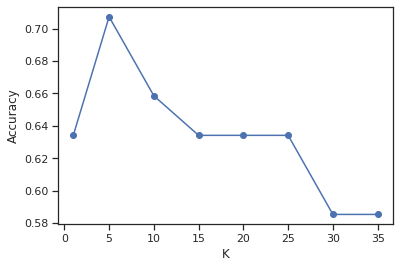

In [47]:
cm6_heart_acc_per_k = acc_k_heart
plt.plot(k_vals,acc_k_heart, '-o')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [48]:
display(Latex(r"\newpage")) #Hopefully should create a page break when we export it

## CM6
### Iris default KNN

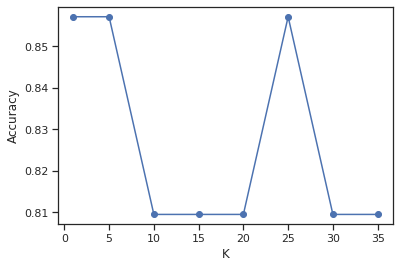

In [49]:
plt.plot(k_vals,cm6_iris_acc_per_k, '-o')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

We can see from the previous plot that we had 3 K's that yeilded the best accuracy, K=1,5,25
### Heart Disease default KNN

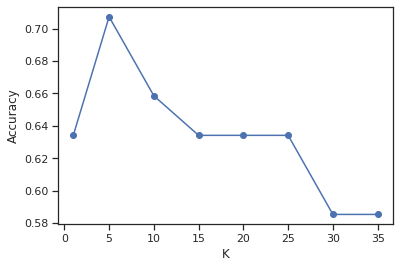

In [50]:
plt.plot(k_vals,cm6_heart_acc_per_k, '-o')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

We can see from the previous plot that the K=5 has the best accuracy on the validation set.

In [51]:
display(Latex(r"\newpage")) #Hopefully should create a page break when we export it

<IPython.core.display.Latex object>

# CM7 
## Q2.4
### Iris Dataset

From the previous question we found that the best K value for the Iris dataset was `K=1`, `K=5` and `K=25`. 
So we choose 1 in hopes that this is the least likely to have overfit the data.

In [52]:
k=1

X_train = iris_train[iris_train.columns[:-1]]
y_train = iris_train.species

X_test = iris_test[iris_test.columns[:-1]]
y_test = iris_test.species

iris_knn = KNeighborsClassifier(n_neighbors=k)

iris_knn.fit(X_train,y_train)
pred = iris_knn.predict(X_test)
pred_prob = iris_knn.predict_proba(X_test)

acc_opt_param = metrics.accuracy_score(y_test, pred)
print('Accuracy:', acc_opt_param)

f1_score = metrics.f1_score(y_test,pred,average='macro')
print('F1-Score:', f1_score)

auc = metrics.roc_auc_score(y_test,pred_prob,average='macro',multi_class='ovr')
print('AUC:', auc)

Accuracy: 0.9047619047619048
F1-Score: 0.905808080808081
AUC: 0.9275793650793651


We see that when compared to the validation set, the classifier does better on the test set

### Heart Dataset

In [53]:
k = 5
X_train = heart_train
y_train = heart_train.target

X_test = heart_test
y_test = heart_test.target

knn_heart = KNeighborsClassifier(n_neighbors=k)
knn_heart.fit(X_train,y_train)

pred = knn_heart.predict(X_test)
pred_prob = knn_heart.predict_proba(X_test)

acc_opt_param = metrics.accuracy_score(y_test, pred)
print('Accuracy:', acc_opt_param)

f1_score = metrics.f1_score(y_test,pred,average='macro')
print('F1-Score:', f1_score)

auc = metrics.roc_auc_score(y_test,pred_prob[:,1],average='macro')
print('AUC:', auc)

Accuracy: 0.7380952380952381
F1-Score: 0.699805068226121
AUC: 0.7241379310344828


We see that with `K=5` as our best K value, the classifiers yeilds a slightly higher accuracy on the test set than the validation set.

In [54]:
display(Latex(r"\newpage")) #Hopefully should create a page break when we export it

<IPython.core.display.Latex object>

### Q2.5 - Normalizing Iris Dataset
To determine the normalization method to use, the MinMax Scaler method (norm function 1) with 
Standard Scaler method (norm function 2) were compared

In [55]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

Norm func: 0
K: 1	 Acc: 0.9047619047619048	 F1: 0.9027777777777778 	AUC: 0.9421296296296297
K: 5	 Acc: 0.9047619047619048	 F1: 0.9027777777777778 	AUC: 0.9891203703703703
K: 10	 Acc: 0.8571428571428571	 F1: 0.8564102564102564 	AUC: 0.9818672839506174
K: 15	 Acc: 0.9047619047619048	 F1: 0.9027777777777778 	AUC: 0.9854938271604938
K: 20	 Acc: 0.9047619047619048	 F1: 0.9027777777777778 	AUC: 0.9854938271604938
K: 25	 Acc: 0.9047619047619048	 F1: 0.9027777777777778 	AUC: 0.9854938271604938
K: 30	 Acc: 0.9047619047619048	 F1: 0.9027777777777778 	AUC: 0.9668209876543209
K: 35	 Acc: 0.8571428571428571	 F1: 0.8564102564102564 	AUC: 0.9735339506172839

Norm func: 1
K: 1	 Acc: 0.8571428571428571	 F1: 0.8502673796791443 	AUC: 0.8949074074074074
K: 5	 Acc: 0.7142857142857143	 F1: 0.7142857142857143 	AUC: 0.9384259259259259
K: 10	 Acc: 0.8571428571428571	 F1: 0.8564102564102564 	AUC: 0.9891203703703703
K: 15	 Acc: 0.8571428571428571	 F1: 0.8564102564102564 	AUC: 0.9891203703703705
K: 20	 Acc: 0.809

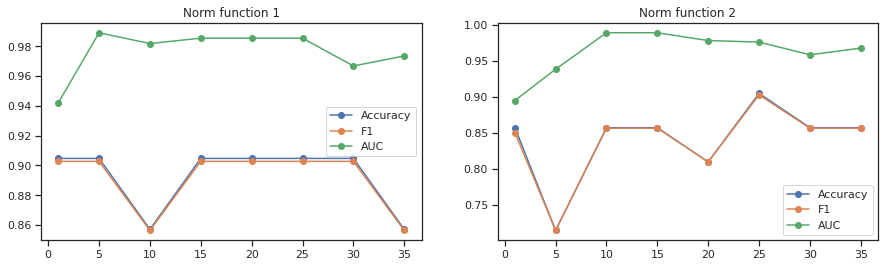

In [56]:
norm_func = [MinMaxScaler(), StandardScaler()]
k_vals = [1,5,10,15,20,25,30,35]
fig, axs = plt.subplots(ncols=len(norm_func), figsize=(15, 4))

metric_per_norm = []

for i, norm in enumerate(norm_func):
    acc_k = []
    f1_k = []
    auc_k = []

    X_train = norm.fit_transform(iris_train[iris_train.columns[:-1]])
    y_train = iris_train.species

    X_val = norm.fit_transform(iris_val[iris_val.columns[:-1]])
    y_val = iris_val.species

    for k in k_vals:
        #create new model
        knn_model = KNeighborsClassifier(n_neighbors=k)
        
        #train model
        knn_model.fit(X_train,y_train)

        #validate model
        pred = knn_model.predict(X_val)
        pred_prob = knn_model.predict_proba(X_val)

        acc_k.append(metrics.accuracy_score(y_val, pred))
        f1_k.append(metrics.f1_score(y_val, pred, average='macro'))
        auc_k.append(metrics.roc_auc_score(y_val,pred_prob,average='macro',multi_class='ovr'))
    
    metric_per_norm.append((acc_k, f1_k, auc_k))

    pd.Series(acc_k, index=k_vals).plot(kind='line', ax=axs[i], marker='o', linestyle='-',label='Accuracy')
    pd.Series(f1_k, index=k_vals).plot(kind='line', ax=axs[i], marker='o', linestyle='-',label='F1')
    pd.Series(auc_k, index=k_vals).plot(kind='line', ax=axs[i], marker='o', linestyle='-',label='AUC')
    axs[i].xaxis.set_ticks(np.arange(0, max(k_vals)+1, 5))
    axs[i].set_title('Norm function {}'.format(i+1))
    axs[i].legend()

for i,norm_metrics in enumerate(metric_per_norm):
    print('Norm func:',i)
    for j,k in enumerate(k_vals):
        print('K: {}\t Acc: {}\t F1: {} \tAUC: {}'.format(k,norm_metrics[0][j],norm_metrics[1][j],norm_metrics[2][j]))
    print()

plt.show()


The best K value we can see is `K=5` when combined with the MinMaxScaler method. This yielded the greatest combinartion of accuracy, f1-score and AUC.

### Q2.6 - Weighted KNN Iris


Weight method: None
K: 1	 Acc: 0.9047619047619048	 F1: 0.9027777777777778 	AUC: 0.9421296296296297
K: 5	 Acc: 0.9047619047619048	 F1: 0.9027777777777778 	AUC: 0.9891203703703703
K: 10	 Acc: 0.8571428571428571	 F1: 0.8564102564102564 	AUC: 0.9818672839506174
K: 15	 Acc: 0.9047619047619048	 F1: 0.9027777777777778 	AUC: 0.9854938271604938
K: 20	 Acc: 0.9047619047619048	 F1: 0.9027777777777778 	AUC: 0.9854938271604938
K: 25	 Acc: 0.9047619047619048	 F1: 0.9027777777777778 	AUC: 0.9854938271604938
K: 30	 Acc: 0.9047619047619048	 F1: 0.9027777777777778 	AUC: 0.9668209876543209
K: 35	 Acc: 0.8571428571428571	 F1: 0.8564102564102564 	AUC: 0.9735339506172839

Weight method: uniform
K: 1	 Acc: 0.9047619047619048	 F1: 0.9027777777777778 	AUC: 0.9421296296296297
K: 5	 Acc: 0.9047619047619048	 F1: 0.9027777777777778 	AUC: 0.9891203703703703
K: 10	 Acc: 0.8571428571428571	 F1: 0.8564102564102564 	AUC: 0.9818672839506174
K: 15	 Acc: 0.9047619047619048	 F1: 0.9027777777777778 	AUC: 0.9854938271604938


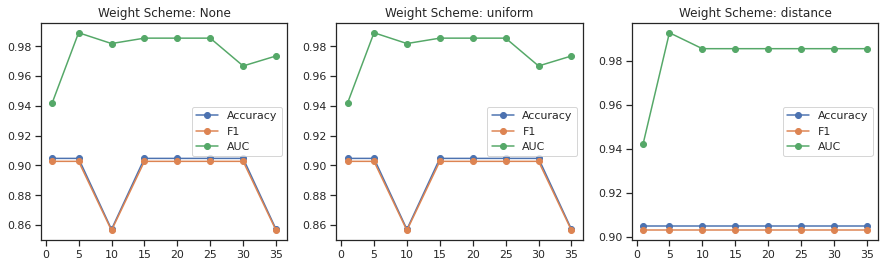

In [57]:
weighted_methods = [None, 'uniform', 'distance']
norm = MinMaxScaler()
metric_per_weight=[]
k_vals = [1,5,10,15,20,25,30,35]
fig, axs = plt.subplots(ncols=len(weighted_methods), figsize=(15, 4))

for i, weight in enumerate(weighted_methods):
    acc_k = []
    f1_k = []
    auc_k = []

    X_train = norm.fit_transform(iris_train[iris_train.columns[:-1]])
    y_train = iris_train.species

    X_val = norm.fit_transform(iris_val[iris_val.columns[:-1]])
    y_val = iris_val.species

    for k in k_vals:
        #create new model
        knn_model = KNeighborsClassifier(n_neighbors=k, weights=weight)
        
        #train model
        knn_model.fit(X_train,y_train)

        #validate model
        pred = knn_model.predict(X_val)
        pred_prob = knn_model.predict_proba(X_val)

        acc_k.append(metrics.accuracy_score(y_val, pred))
        f1_k.append(metrics.f1_score(y_val,pred,average='macro'))
        auc_k.append(metrics.roc_auc_score(y_val,pred_prob,average='macro',multi_class='ovr'))
    

    metric_per_weight.append((acc_k, f1_k, auc_k))
    
    pd.Series(acc_k, index=k_vals).plot(kind='line', ax=axs[i], marker='o', linestyle='-',label='Accuracy')
    pd.Series(f1_k, index=k_vals).plot(kind='line', ax=axs[i], marker='o', linestyle='-',label='F1')
    pd.Series(auc_k, index=k_vals).plot(kind='line', ax=axs[i], marker='o', linestyle='-',label='AUC')
    axs[i].xaxis.set_ticks(np.arange(0, max(k_vals)+1, 5))
    axs[i].set_title('Weight Scheme: {}'.format(weighted_methods[i]))
    axs[i].legend()

for i,weight_metrics in enumerate(metric_per_weight):
    print('Weight method:',weighted_methods[i])
    for j,k in enumerate(k_vals):
        print('K: {}\t Acc: {}\t F1: {} \tAUC: {}'.format(k,weight_metrics[0][j],weight_metrics[1][j],weight_metrics[2][j]))
    print()

plt.show()

We see that the default weight scheme is indead the uniform scheme.
We also see that the distance weight scheme produce consistend accuracies across all K values, bit it also yeilds the greated f1-score and AUC when paired with `K=5`

### Q2.5 - Normalizing Heart Dataset
To determine the normalization method to use, the MinMax Scaler method (norm function 1) with 
Standard Scaler method (norm function 2) were compared

Norm func: 0
K: 1	 Acc: 0.7073170731707317	 F1: 0.7057416267942583 	AUC: 0.7095238095238096
K: 5	 Acc: 0.7560975609756098	 F1: 0.755952380952381 	AUC: 0.8214285714285714
K: 10	 Acc: 0.8048780487804879	 F1: 0.8047619047619048 	AUC: 0.8547619047619046
K: 15	 Acc: 0.7560975609756098	 F1: 0.755952380952381 	AUC: 0.8738095238095238
K: 20	 Acc: 0.7804878048780488	 F1: 0.7799642218246869 	AUC: 0.880952380952381
K: 25	 Acc: 0.7560975609756098	 F1: 0.7524154589371981 	AUC: 0.8535714285714285
K: 30	 Acc: 0.7560975609756098	 F1: 0.7524154589371981 	AUC: 0.8535714285714285
K: 35	 Acc: 0.8292682926829268	 F1: 0.8276276276276276 	AUC: 0.8821428571428571

Norm func: 1
K: 1	 Acc: 0.6341463414634146	 F1: 0.6341463414634146 	AUC: 0.6345238095238095
K: 5	 Acc: 0.7804878048780488	 F1: 0.7804878048780488 	AUC: 0.8607142857142855
K: 10	 Acc: 0.7804878048780488	 F1: 0.7799642218246869 	AUC: 0.8511904761904762
K: 15	 Acc: 0.7560975609756098	 F1: 0.7547846889952152 	AUC: 0.8488095238095238
K: 20	 Acc: 0.731707

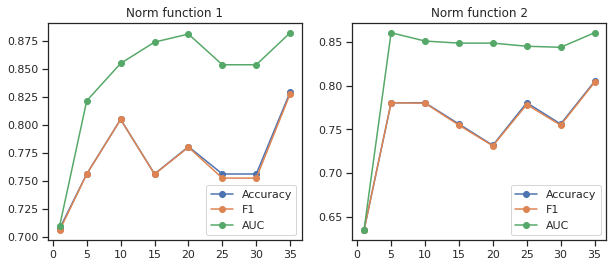

In [58]:
norm_func = [MinMaxScaler(), StandardScaler()]
k_vals = [1,5,10,15,20,25,30,35]
metric_per_norm=[]
fig, axs = plt.subplots(ncols=len(norm_func), figsize=(10, 4))

for i, norm in enumerate(norm_func):
    acc_k = []
    f1_k = []
    auc_k = []

    X_train = norm.fit_transform(heart_train[heart_train.columns[:-1]])
    y_train = heart_train.target

    X_val = norm.fit_transform(heart_val[heart_val.columns[:-1]])
    y_val = heart_val.target

    for k in k_vals:
        #create new model
        knn_model = KNeighborsClassifier(n_neighbors=k)
        
        #train model
        knn_model.fit(X_train,y_train)

        #validate model
        pred = knn_model.predict(X_val)
        pred_prob = knn_model.predict_proba(X_val)

        acc_k.append(metrics.accuracy_score(y_val, pred))
        f1_k.append(metrics.f1_score(y_val,pred,average='macro'))
        auc_k.append(metrics.roc_auc_score(y_val,pred_prob[:,1],average='macro'))
    
    metric_per_norm.append((acc_k, f1_k, auc_k))

    pd.Series(acc_k, index=k_vals).plot(kind='line', ax=axs[i], marker='o', linestyle='-',label='Accuracy')
    pd.Series(f1_k, index=k_vals).plot(kind='line', ax=axs[i], marker='o', linestyle='-',label='F1')
    pd.Series(auc_k, index=k_vals).plot(kind='line', ax=axs[i], marker='o', linestyle='-',label='AUC')
    axs[i].xaxis.set_ticks(np.arange(0, max(k_vals)+1, 5))
    axs[i].set_title('Norm function {}'.format(i+1))
    axs[i].legend()

for i,norm_metrics in enumerate(metric_per_norm):
    print('Norm func:',i)
    for j,k in enumerate(k_vals):
        print('K: {}\t Acc: {}\t F1: {} \tAUC: {}'.format(k,norm_metrics[0][j],norm_metrics[1][j],norm_metrics[2][j]))
    print()

plt.show()

After examining the output, we can see that for MinMaxScalar, when `K=35` it yeilds the highest accuracy, f1-score, and AUC.

### Q2.6
#### Weighted KNN


Weight scheme: None
K: 1	 Acc: 0.7073170731707317	 F1: 0.7057416267942583  	AUC: 0.7095238095238096
K: 5	 Acc: 0.7560975609756098	 F1: 0.755952380952381  	AUC: 0.8214285714285714
K: 10	 Acc: 0.8048780487804879	 F1: 0.8047619047619048  	AUC: 0.8547619047619046
K: 15	 Acc: 0.7560975609756098	 F1: 0.755952380952381  	AUC: 0.8738095238095238
K: 20	 Acc: 0.7804878048780488	 F1: 0.7799642218246869  	AUC: 0.880952380952381
K: 25	 Acc: 0.7560975609756098	 F1: 0.7524154589371981  	AUC: 0.8535714285714285
K: 30	 Acc: 0.7560975609756098	 F1: 0.7524154589371981  	AUC: 0.8535714285714285
K: 35	 Acc: 0.8292682926829268	 F1: 0.8276276276276276  	AUC: 0.8821428571428571

Weight scheme: uniform
K: 1	 Acc: 0.7073170731707317	 F1: 0.7057416267942583  	AUC: 0.7095238095238096
K: 5	 Acc: 0.7560975609756098	 F1: 0.755952380952381  	AUC: 0.8214285714285714
K: 10	 Acc: 0.8048780487804879	 F1: 0.8047619047619048  	AUC: 0.8547619047619046
K: 15	 Acc: 0.7560975609756098	 F1: 0.755952380952381  	AUC: 0.8738095238

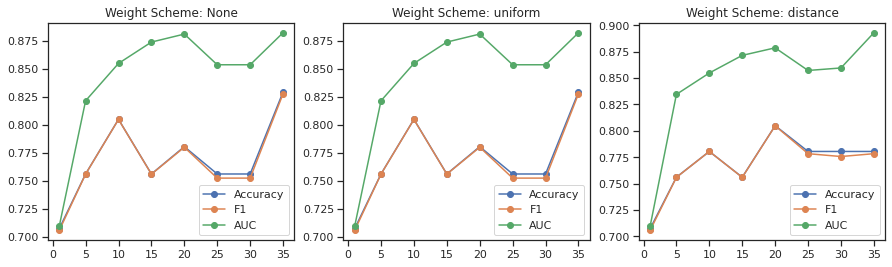

In [59]:
weighted_methods = [None, 'uniform', 'distance']
norm = MinMaxScaler()
metric_per_weight=[]

k_vals = [1,5,10,15,20,25,30,35]
fig, axs = plt.subplots(ncols=len(weighted_methods), figsize=(15, 4))

for i, weight in enumerate(weighted_methods):
    acc_k = []
    f1_k = []
    auc_k = []

    X_train = norm.fit_transform(heart_train[heart_train.columns[:-1]])
    y_train = heart_train.target

    X_val = norm.fit_transform(heart_val[heart_val.columns[:-1]])
    y_val = heart_val.target

    for k in k_vals:
        #create new model
        knn_model = KNeighborsClassifier(n_neighbors=k, weights=weight)
        
        #train model
        knn_model.fit(X_train,y_train)

        #validate model
        pred = knn_model.predict(X_val)
        pred_prob = knn_model.predict_proba(X_val)

        acc_k.append(metrics.accuracy_score(y_val, pred))
        f1_k.append(metrics.f1_score(y_val,pred,average='macro'))
        auc_k.append(metrics.roc_auc_score(y_val,pred_prob[:,1],average='macro'))
    
    metric_per_weight.append((acc_k, f1_k, auc_k))
    pd.Series(acc_k, index=k_vals).plot(kind='line', ax=axs[i], marker='o', linestyle='-',label='Accuracy')
    pd.Series(f1_k, index=k_vals).plot(kind='line', ax=axs[i], marker='o', linestyle='-',label='F1')
    pd.Series(auc_k, index=k_vals).plot(kind='line', ax=axs[i], marker='o', linestyle='-',label='AUC')
    axs[i].set_title('Weight Scheme: {}'.format(weighted_methods[i]))
    axs[i].xaxis.set_ticks(np.arange(0, max(k_vals)+1, 5))
    axs[i].legend()

for i,weight_metrics in enumerate(metric_per_weight):
    print('Weight scheme:',weighted_methods[i])
    for j,k in enumerate(k_vals):
        print('K: {}\t Acc: {}\t F1: {}  \tAUC: {}'.format(k,weight_metrics[0][j],weight_metrics[1][j],weight_metrics[2][j]))
    print()

plt.show()

Again, we see that the default weight scheme and uniform are the same schemes.

We also see that uniform weight scheme yeilds the highest accuracy of 0.829, the highest f1-score, and the highest AUC. Hence, `K=35`, 
the uniform weight scheme, and MinMaxScale will be used for the classifier.

In [60]:
display(Latex(r"\newpage")) #Hopefully should create a page break when we export it

<IPython.core.display.Latex object>

# CM 7
## Q2.7
### Iris Test Set

In [61]:
weight = 'distance'
norm = MinMaxScaler()
k = 5

X_train = norm.fit_transform(iris_train[iris_train.columns[:-1]])
y_train = iris_train.species

X_test = norm.fit_transform(iris_test[iris_test.columns[:-1]])
y_test = iris_test.species

#create new model
knn_model = KNeighborsClassifier(n_neighbors=k, weights=weight)
    
#train model
knn_model.fit(X_train,y_train)

#validate model
pred = knn_model.predict(X_test)
pred_prob = knn_model.predict_proba(X_test)

acc_opt_param = metrics.accuracy_score(y_test, pred)
print('Accuracy:', acc_opt_param)

f1_score = metrics.f1_score(y_test,pred,average='macro')
print('F1-Score:', f1_score)

auc = metrics.roc_auc_score(y_test,pred_prob,average='macro',multi_class='ovr')
print('AUC:', auc)

Accuracy: 1.0
F1-Score: 1.0
AUC: 1.0


Baseline output:
```
Accuracy: 0.9047619047619048
F1-Score: 0.905808080808081
AUC: 0.9275793650793651
```

Compared to the baseline classfiers we see an increase in all 3 metrics, we also see that the original K value needed to be changed from 1 to 5.

### Heart Test Set

In [62]:
weight = 'uniform'
norm = MinMaxScaler()
k = 35

X_train = norm.fit_transform(heart_train[heart_train.columns[:-1]])
y_train = heart_train.target

X_test = norm.fit_transform(heart_test[heart_test.columns[:-1]])
y_test = heart_test.target

#create new model
knn_model = KNeighborsClassifier(n_neighbors=k, weights=weight)
    
#train model
knn_model.fit(X_train,y_train)

#validate model
pred = knn_model.predict(X_test)
pred_prob = knn_model.predict_proba(X_test)

acc_opt_param = metrics.accuracy_score(y_test, pred)
print('Accuracy:', acc_opt_param)

f1_score = metrics.f1_score(y_test,pred,average='macro')
print('F1-Score:', f1_score)

auc = metrics.roc_auc_score(y_test,pred_prob[:,1],average='macro')
print('AUC:', auc)

Accuracy: 0.8095238095238095
F1-Score: 0.7666666666666666
AUC: 0.8713527851458885


Baseline metrics:
```
Accuracy: 0.7380952380952381
F1-Score: 0.699805068226121
AUC: 0.7241379310344828
```

We see that all 3 metrics have increase compared to the baseline classifiers. Also, the K value has changed from K=5 to K=35 as the optimium parameter.

In [63]:
display(Latex(r"\newpage")) #Hopefully should create a page break when we export it

<IPython.core.display.Latex object>

# CM8
## Q3.1
We had to split the dataset into train, validation, and test sets to ensure 
that we could find the optimal parameters (K) for our model that were also optimal 
when facing data never before seen. The model was tuned using the training and validation set
to find the optimal K value. After determining the best K value for the model, classification metrics were checked using the 
test dataset to ensure reproducability for unseen data. This allowed us to be confident in our model
when going outside of a training environment.

## Q3.2
We did not evaluate directly on the test set because if we tuned using the test set our model would have "seen" that data before.
The tuned parameter would account for the test set and give a false idea that the model is good in a non-training environment.

## Q3.3
The accuracy was affected by K differently in each of the datasets. For the Iris dataset, 
by increasing K the accuracy decreased where as for the heart disease the accuracy flucuated but still increased.
This most likley happend because the distribution of data is different between the two datasets. For Iris we had 3 features
that were correlated so it should be easier to make a classification, where as for the heart disease the features were less strongly correlated.

In [64]:
display(Latex(r"\newpage")) #Hopefully should create a page break when we export it

<IPython.core.display.Latex object>

# Q 4
# Kaggle
## Iris

In [65]:
iris_train = pd.read_csv('iris_train.csv')
iris_test = pd.read_csv('iris_test.csv')

iris_train.species = iris_train.species.replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

iris_train, _, _ = remove_outliers(iris_train, 2.5)

for col in iris_train.columns[:-1]:
    iris_train[col].fillna(iris_train[col].mean(), inplace = True);


In [66]:
weight = 'distance'
norm = MinMaxScaler()
k = 5

X_train = norm.fit_transform(iris_train[iris_train.columns[:-1]])
y_train = iris_train.species

X_test = norm.fit_transform(iris_test[iris_test.columns[1:]])
#y_test = iris_test.species

#create new model
knn_model = KNeighborsClassifier(n_neighbors=k, weights=weight)
    
#train model
knn_model.fit(X_train,y_train)

#validate model
preds = knn_model.predict(X_test)

print('id,species')
for i,pred in enumerate(preds):
    print(i,',',pred)

id,species
0 , 2
1 , 1
2 , 1
3 , 1
4 , 2
5 , 2
6 , 1
7 , 1
8 , 0
9 , 2
10 , 0
11 , 0
12 , 2
13 , 2
14 , 0
15 , 2
16 , 1
17 , 0
18 , 0
19 , 0
20 , 1
21 , 0
22 , 1
23 , 2
24 , 2
25 , 1
26 , 1
27 , 1
28 , 1
29 , 0
30 , 1
31 , 2
32 , 1
33 , 0
34 , 2
35 , 0
36 , 0
37 , 0
38 , 0
39 , 1
40 , 1
41 , 0
42 , 2
43 , 2
44 , 1


## Heart Disease

In [67]:
heart_train_kaggle = pd.read_csv('heart_train.csv')
heart_test_kaggle = pd.read_csv('heart_test.csv')
features = ['age', 'oldpeak', 'thalach', 'cp', 'slope']

heart_train_kaggle = heart_train_kaggle[features+['target']]
heart_test_kaggle = heart_test_kaggle[features]

heart_train_kaggle, _, _ = remove_outliers(heart_train_kaggle, 2.5)

for col in heart_train_kaggle.columns[:-1]:
    if col in nums:
        heart_train_kaggle[col].fillna(heart_train_kaggle[col].mean(), inplace = True)
    if col in cats:
        heart_train_kaggle[col].fillna(heart_train_kaggle[col].mode()[0], inplace = True)

In [68]:
weight = 'uniform'
norm = MinMaxScaler()
k = 35

X_train = norm.fit_transform(heart_train_kaggle[heart_train_kaggle.columns[:-1]])
y_train = heart_train_kaggle.target

X_test = norm.fit_transform(heart_test_kaggle[heart_test_kaggle.columns])

#create new model
knn_model = KNeighborsClassifier(n_neighbors=k, weights=weight)
    
#train model
knn_model.fit(X_train,y_train)

#validate model
preds = knn_model.predict(X_test)

print('id,target')
for i,pred in enumerate(preds):
    print(i,',',pred)

id,target
0 , 1
1 , 1
2 , 0
3 , 1
4 , 1
5 , 0
6 , 1
7 , 1
8 , 0
9 , 0
10 , 0
11 , 1
12 , 0
13 , 0
14 , 1
15 , 0
16 , 1
17 , 0
18 , 1
19 , 1
20 , 1
21 , 1
22 , 1
23 , 1
24 , 1
25 , 1
26 , 0
27 , 0
28 , 1
29 , 0
30 , 0
31 , 1
32 , 1
33 , 0
34 , 0
35 , 1
36 , 0
37 , 0
38 , 1
39 , 1
40 , 1
41 , 1
42 , 0
43 , 1
44 , 0
45 , 0
46 , 1
47 , 0
48 , 0
49 , 1
50 , 1
51 , 0
52 , 1
53 , 1
54 , 0
55 , 1
56 , 1
57 , 0
58 , 1
59 , 1
60 , 0
61 , 0
62 , 1
63 , 1
64 , 1
65 , 0
66 , 1
67 , 0
68 , 0
69 , 1
70 , 1
71 , 1
72 , 1
73 , 1
74 , 1
75 , 0
76 , 1
77 , 1
78 , 1
79 , 0
80 , 1
81 , 0
82 , 1
83 , 1
84 , 1
85 , 0
86 , 1
87 , 1
88 , 1
89 , 0
90 , 1


## References

#### Boxplots to idenitfy outliers
https://www.simplypsychology.org/boxplots.html#:~:text=When%20reviewing%20a%20box%20plot,whiskers%20of%20the%20box%20plot.&text=For%20example%2C%20outside%201.5%20times,Q3%20%2B%201.5%20*%20IQR).

#### Heatmap to visualize outliers
https://seaborn.pydata.org/generated/seaborn.heatmap.html

#### Zscore method to remove outliers
https://statisticsbyjim.com/basics/outliers/#:~:text=A%20standard%20cut%2Doff%20value,the%20shading%20under%20the%20curve.

#### KNN Classifier
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

#### MinMaxScaler normalization api
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

#### StandardScalara normalization api
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

#### Pandas Documentation for handling dataframs
https://pandas.pydata.org/docs/

#### Visualizing data using seaborn
https://seaborn.pydata.org/tutorial/relational.html

#### Train test split api from sklearn
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html